# _Tested Working in Linux, need to test for Windows and Mac_

## University of Pennsylvania, Masters in Applied Geosciences

### Groundwater Flow and Transport Modeling, Prepared by Carl Mastropaolo

### Class Problem 1

#### Notebook by Spencer Harris

In [1]:
import sys
print(sys.executable)

/home/sbhgeo/Documents/Fogland/conda/bin/python


In [2]:
%matplotlib inline 
# opens matplotlib "inline" or in the notebook 
# %is a notebook specific command, remove if running outside of notebook
import os 
import flopy

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mfexe = os.path.join("..", "..", "..", "bin", "mf2005.nix") # adds path to mf2005.nix, which will be our executeable, to mfexe
abspath = os.path.abspath(mfexe) # assigns absolute path of mfexe to abspath, double checking
print(mfexe) #printing the variables
print(abspath)

../../../bin/mf2005.nix
/home/sbhgeo/Documents/Fogland/bin/mf2005.nix


In [5]:
os.path.isfile(mfexe) # returns True if path is an existing regular file checking "link"

True

### Model starts below:

In [6]:
# creating an empty modflow container in FloPy, m is being defined as a python object
# Modflow model is stored in flopy -> modflow -> 
# shift + tab here to see how to input necessary files

m = flopy.modflow.Modflow(modelname = 'Prob1a', exe_name = mfexe) 

#### below we add packages to create a minimum viable model:

In [7]:
nlay = 1
nrow = 1
ncol = 4
dis = flopy.modflow.ModflowDis(m, nlay=nlay, nrow=nrow, ncol=ncol)

In [8]:
ibound = np.ones((nlay, nrow, ncol), dtype=np.int)
ibound[0,0,0] = -1
ibound[0,0,-1] = -1 
# or could be the following ?:
#ibound = [0,0,3] = -1

strt = np.ones((nlay, nrow, ncol), dtype=np.float)
strt[0,0,0:3] = 50.0 #assigns 50' head to the first 3 cells
strt[0,0,3] = 47.0 #assigns 47' head to the fourth cell

bas = flopy.modflow.ModflowBas(m, ibound=ibound, strt=strt)
bcf = flopy.modflow.ModflowBcf(m, laycon=0, trpy=1.0, hdry=777.7, tran=200.0)
sip = flopy.modflow.ModflowSip(m, mxiter=20, nparm=5, accl=1, hclose=1e-06, ipcalc=1, wseed=2e-12, iprsip=1)

#below is output control
stress_period_data = {(0,0):['save head','save budget']}
oc = flopy.modflow.ModflowOc(m, stress_period_data=stress_period_data)

print(ibound)
print(strt)


[[[-1  1  1 -1]]]
[[[ 50.  50.  50.  47.]]]


####  writing our MODFLOW-2005 input files!

In [9]:
m.write_input()

#### running the model

In [10]:
m.run_model()

FloPy is using the following executable to run the model: ../../../bin/mf2005.nix

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: Prob1a.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2017/10/04 12:41:34

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2017/10/04 12:41:34
 Elapsed run time:  0.052 Seconds

  Normal termination of simulation


(True, [])

#### fetching the heads file from the MODFLOW output

In [11]:
subfolder = '.'
fname = os.path.join(subfolder, 'Prob1a.hds')
headobj = flopy.utils.HeadFile(fname)
headarray = headobj.get_data(totim=1.0)

#### plotting the heads! the real glory of FloPy vs .txt files!

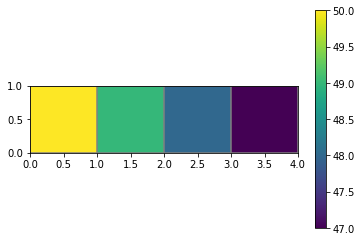

In [12]:
mm = flopy.plot.ModelMap(model=m)
mm.plot_ibound()
mm.plot_grid()
mm.plot_array(headarray)
hplot = mm.plot_array(headarray)
plt.colorbar(hplot)

#### The head levels from which we are creating the above plot

In [13]:
print(headarray)

[[[ 50.  49.  48.  47.]]]
